In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#課題データ
data = np.array([[1, 0.2, 0.8, 1],
                 [1, 0.3, 0.2, 0],
                 [1, 0.7, 0.5, 0],
                 [1, 0.4, 0.7, 1],
                 [1, 0.3, 0.9, 1],
                 [1, 0.6, 0.3, 0]
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入

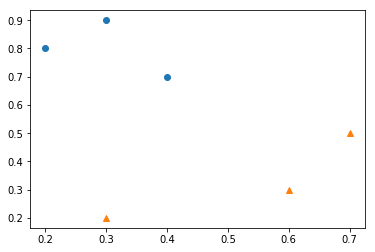

In [3]:
#グラフ表示
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == 0, 0], x[t == 0, 1], '^')

In [4]:
w = np.array([1.0,1.0,1.0]) #wの初期値の設定
eta = 0.1 #学習率
K = 1000 #繰り返し回数
f_value = [] #目的関数値
index = [] #繰り返し回数

In [5]:
#シグモイド関数
def sigmoid(w,x):
    return 1 / (1 + np.exp(-np.dot(w,x)))

0.2684035744801293
[-3.16092171 -7.54909632 11.80819824]


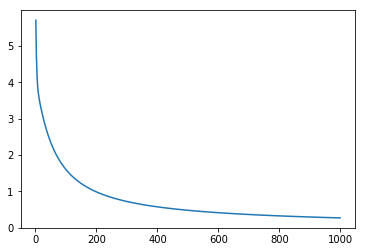

In [6]:
for k in range(K):
    #交差エントロピー誤差関数
    f = 0.0
    for i in range(len(data)):
        f += data[i][3] * np.log(sigmoid(w,data[i][0:3])) + (1 - data[i][3] ) * np.log(1 - sigmoid(w,data[i][0:3]))
    f *= -1
    w_sum = np.array([0.0,0.0,0.0]) #第１成分w0更新の和、第２成分w1, 第３成分w2
    #更新式の和の部分の計算
    for i in range(len(data)):
        for j in range(len(w)):
            w_sum[j] += (sigmoid(w,data[i][0:3]) - data[i][3]) * data[i][j] 
    #wの更新
    for j in range(len(w)):
        w[j] -= eta * w_sum[j]
    if(k > 0):
        index.append(k)
        f_value.append(f)
print(f)
print(w)
plt.plot(index, f_value)

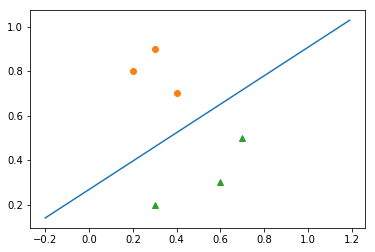

In [7]:
p = np.arange(-0.2, 1.2, 0.01)
q = -w[0]/w[2] - w[1]/w[2]*p
plt.plot(p, q)
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == 0, 0], x[t == 0, 1], '^')

In [8]:
for i in range(len(data)):
    print(str(i)+"番目データの確率")
    print(sigmoid(w,data[i][0:3]))

0番目データの確率
0.991639302799508
1番目データの確率
0.04461642002133343
2番目データの確率
0.07302058197721911
3番目データの確率
0.8894542418297877
4番目データの確率
0.9945231203070665
5番目データの確率
0.0155515682279649
